In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
#import sklearn.datasets
from scipy import stats
from ipywidgets import interact, interact_manual

In [3]:
diamanti = pd.read_csv("diamonds.csv")
diamanti.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y   
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  \
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [4]:
diamanti.count()

Unnamed: 0    53940
carat         53940
cut           53940
color         53940
clarity       53940
depth         53940
table         53940
price         53940
x             53940
y             53940
z             53940
dtype: int64

In [5]:
diamanti.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [6]:
diamanti.describe()

Unnamed: 0         carat         depth         table         price   
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  \
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

<Axes: xlabel='carat', ylabel='price'>

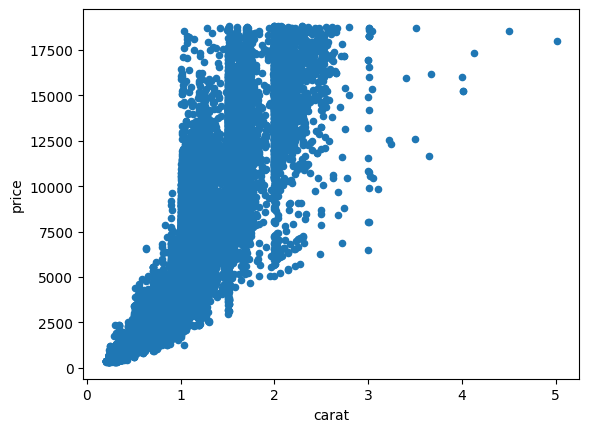

In [7]:
diamanti.plot.scatter(x="carat", y="price")

<Axes: xlabel='carat', ylabel='price'>

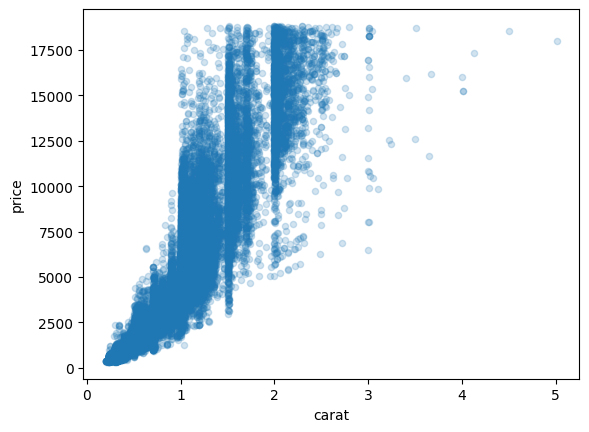

In [8]:
diamanti.plot.scatter(x="carat", y="price", alpha=0.2)

<Axes: xlabel='carat', ylabel='price'>

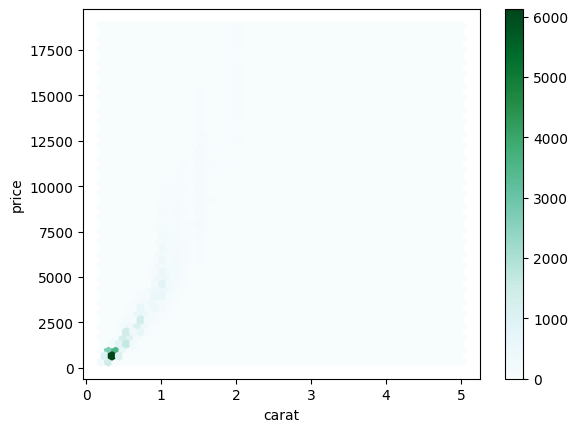

In [9]:
diamanti.plot.hexbin(x="carat", y="price", gridsize=50)

<Axes: xlabel='carat', ylabel='price'>

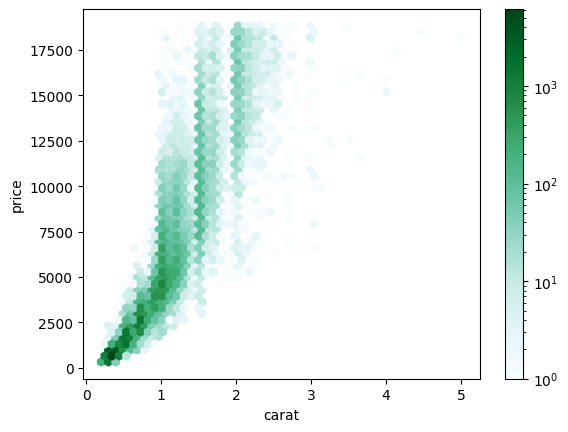

In [10]:
diamanti.plot.hexbin(x="carat", y="price", gridsize=50, bins="log")

In [11]:
diamanti.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [12]:
diamanti.cut.value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

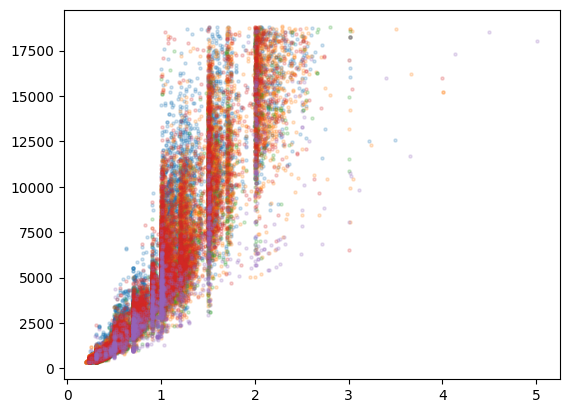

In [13]:
fig, ax = plt.subplots()
for cut in diamanti.cut.unique():
    sotto = diamanti[diamanti.cut == cut]
    ax.scatter(sotto.carat, sotto.price, alpha=0.2, s=5)

In [14]:
g = sns.FacetGrid(diamanti, col="cut", aspect=1.0, col_wrap=3)
g.map(plt.scatter, "carat", "price", alpha=0.2)

NameError: name 'sns' is not defined

In [17]:
import scipy.stats as stats

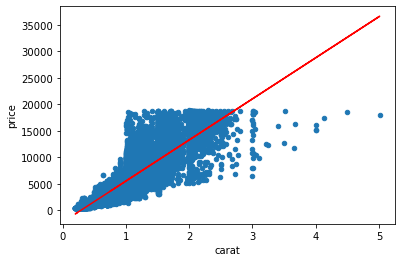

In [18]:
diamanti.plot.scatter(x="carat", y="price")
slope, intercept, *rest = stats.linregress(diamanti.carat, diamanti.price)
plt.plot(diamanti.carat, diamanti.carat * slope + intercept, color="red")

In [19]:
anscombe = sns.load_dataset("anscombe")
anscombe.head(n=20)

dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13

In [20]:
def statistiche(ds):
    return [np.mean(ds), np.var(ds), np.corrcoef(ds.x, ds.y)[0][1]]


pd.set_option("max_colwidth", 100)
anscombe.groupby("dataset").apply(statistiche).head()

/home/fc/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/fc/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


dataset
I        [[9.0, 7.500909090909093], [10.0, 3.7520628099173554], 0.81642051634484]
II       [[9.0, 7.50090909090909], [10.0, 3.752390082644628], 0.8162365060002428]
III                   [[9.0, 7.5], [10.0, 3.747836363636364], 0.8162867394895984]
IV     [[9.0, 7.500909090909091], [10.0, 3.7484082644628103], 0.8165214368885028]
dtype: object

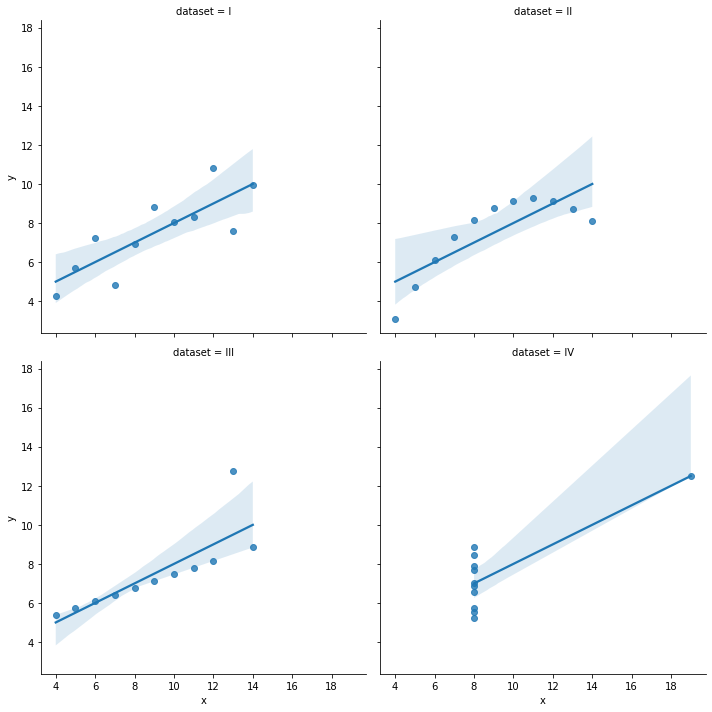

In [21]:
sns.lmplot(data=anscombe, x="x", y="y", col="dataset", col_wrap=2)